<a href="https://colab.research.google.com/github/Lakshya977/1/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance beautifulsoup4 requests pandas matplotlib tensorflow scikit-learn


In [ ]:
import requests
from bs4 import BeautifulSoup

def get_news_from_google(query='Apple', num_articles=20):

    url = f"https://news.google.com/search?q={query}&hl=en-US&gl=US&ceid=US:en"

    response = requests.get(url)


    soup = BeautifulSoup(response.text, 'html.parser')


    headlines = []


    for item in soup.find_all('h3')[:num_articles]:
        if item.get_text():
            headlines.append(item.get_text())

    return headlines


headlines = get_news_from_google('Apple', num_articles=20)
if headlines:
    for idx, headline in enumerate(headlines, 1):
        print(f"{idx}. {headline}")
else:
    print("No headlines found.")


1. Apple aims to source all US iPhones from India by 2026
2. Apple, Amazon, and Microsoft report earnings this week
3. Apple warns iPhone users to delete Chrome browser


In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment(headlines):

    analyzer = SentimentIntensityAnalyzer()


    scores = []


    for h in headlines:
        score = analyzer.polarity_scores(h)['compound']
        scores.append(score)


    average_sentiment = sum(scores) / len(scores) if scores else 0
    return average_sentiment


sentiment_score = analyze_sentiment(headlines)
print(f"Average Sentiment Score: {sentiment_score:.4f}")


Average Sentiment Score: 0.0251


In [ ]:
import yfinance as yf

def get_stock_data(ticker='AAPL', start_date='2023-01-01', end_date='2024-01-01'):

    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data


stock_data = get_stock_data('AAPL', '2023-01-01', '2024-01-01')
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632523  129.395510  122.742865  128.782641  112117500
2023-01-04  124.907707  127.181276  123.642420  125.431615   89113600
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700
2023-01-06  128.130219  128.792516  123.454587  124.561717   87754700
2023-01-09  128.654129  131.876670  128.397123  128.970458   70790800


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def prepare_data(stock_data, sentiment_score, time_steps=30):

    sentiment_score = np.repeat(sentiment_score, len(stock_data))

    stock_data = stock_data[['Close']]
    stock_data.loc[:, 'Sentiment'] = sentiment_score

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data)

    X = []
    y = []

    for i in range(time_steps, len(scaled_data)):
        X.append(scaled_data[i-time_steps:i, :])
        y.append(scaled_data[i, 0])

    X = np.array(X)
    y = np.array(y)

    return X, y, scaler

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def prepare_data(stock_data, sentiment_score, time_steps=30):

    sentiment_score = np.repeat(sentiment_score, len(stock_data))

    stock_data = stock_data[['Close']]
    stock_data.loc[:, 'Sentiment'] = sentiment_score

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data)

    X = []
    y = []

    for i in range(time_steps, len(scaled_data)):
        X.append(scaled_data[i-time_steps:i, :])
        y.append(scaled_data[i, 0])

    X = np.array(X)
    y = np.array(y)

    return X, y, scaler


X, y, scaler = prepare_data(stock_data, sentiment_score)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (176, 30, 2), Testing set size: (44, 30, 2)


<ipython-input-14-45b0e74b37a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.loc[:, 'Sentiment'] = sentiment_score


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


model = Sequential()


model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))


model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 2/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.0051 - val_loss: 0.0023
Epoch 3/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 4/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 5/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 6/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0037 - val_loss: 8.3980e-04
Epoch 7/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 8/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0050 - val_loss: 0.0017
Epoch 9/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0044 - val_loss: 0.0031
Epoch 10/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 11/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 12/2000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - lo

In [ ]:

test_loss = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.8952e-04
Test loss: 0.0008632397511973977


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


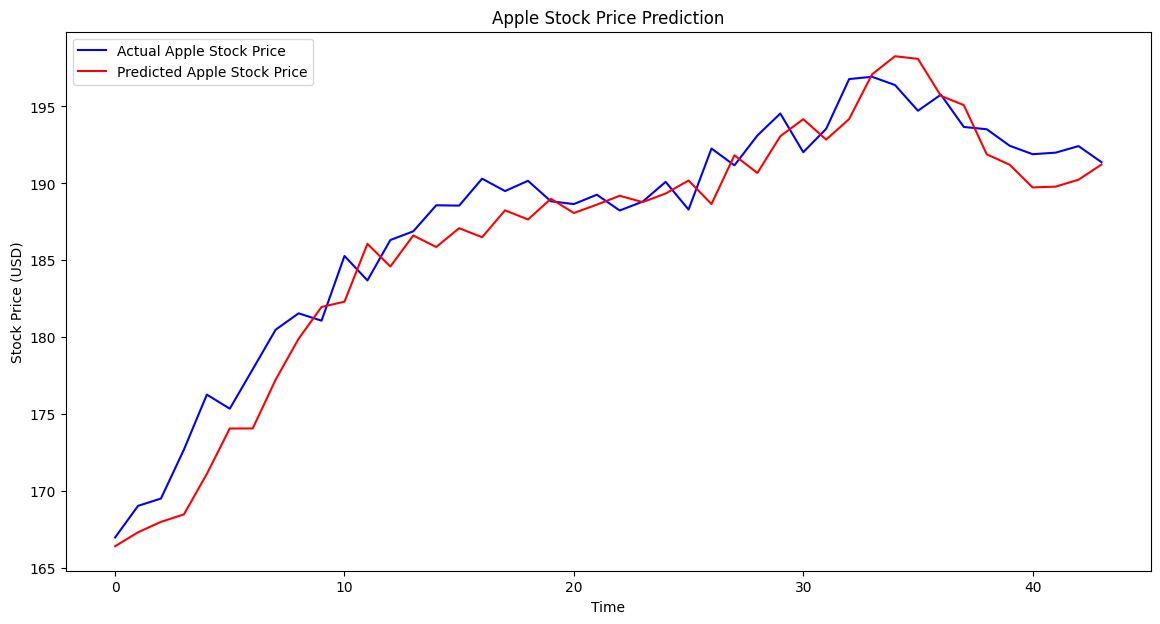

In [ ]:
import matplotlib.pyplot as plt


predictions = model.predict(X_test)


predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))), axis=1))[:, 0]


plt.figure(figsize=(14,7))
plt.plot(y_test_actual, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


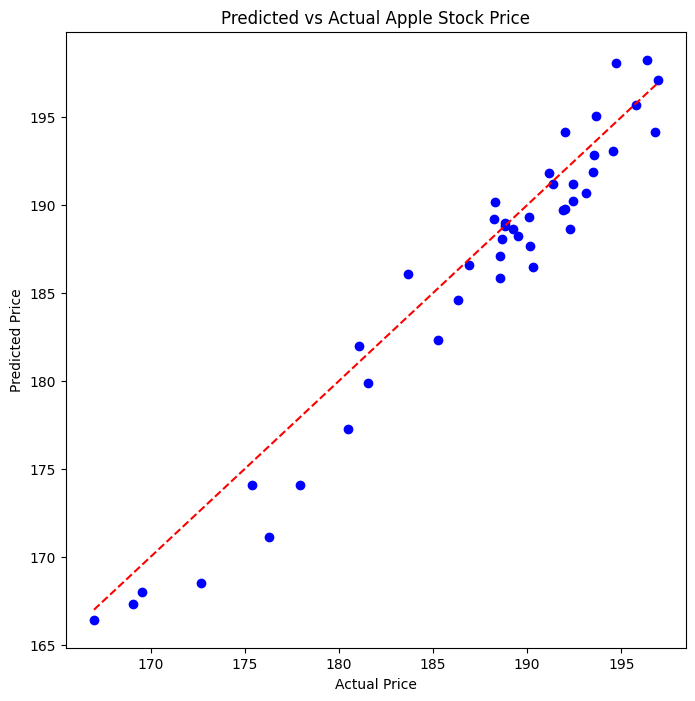

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual, predictions, color='blue')
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red', linestyle='--')
plt.title('Predicted vs Actual Apple Stock Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()
